<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [5]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422




1.   **Definición del problema:** Estimar la media de las columnas y determinar que modelación entrega una mejor predicción de la misma.



2.   **Estadistica descriptiva:**



In [6]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
housing.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64


In [10]:
housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


Podemos notar que las desvaciones estandar de cada columna no estan lejos el promedio, exceptuando por ´Population´. Todos los datos son de tipo float. Ademas, no hay ningun dato Nan.

3. **Visualización descriptiva:** Como estamos determinando la distribucion de datos, el mejor tipo de grafico en este sentido es un histograma






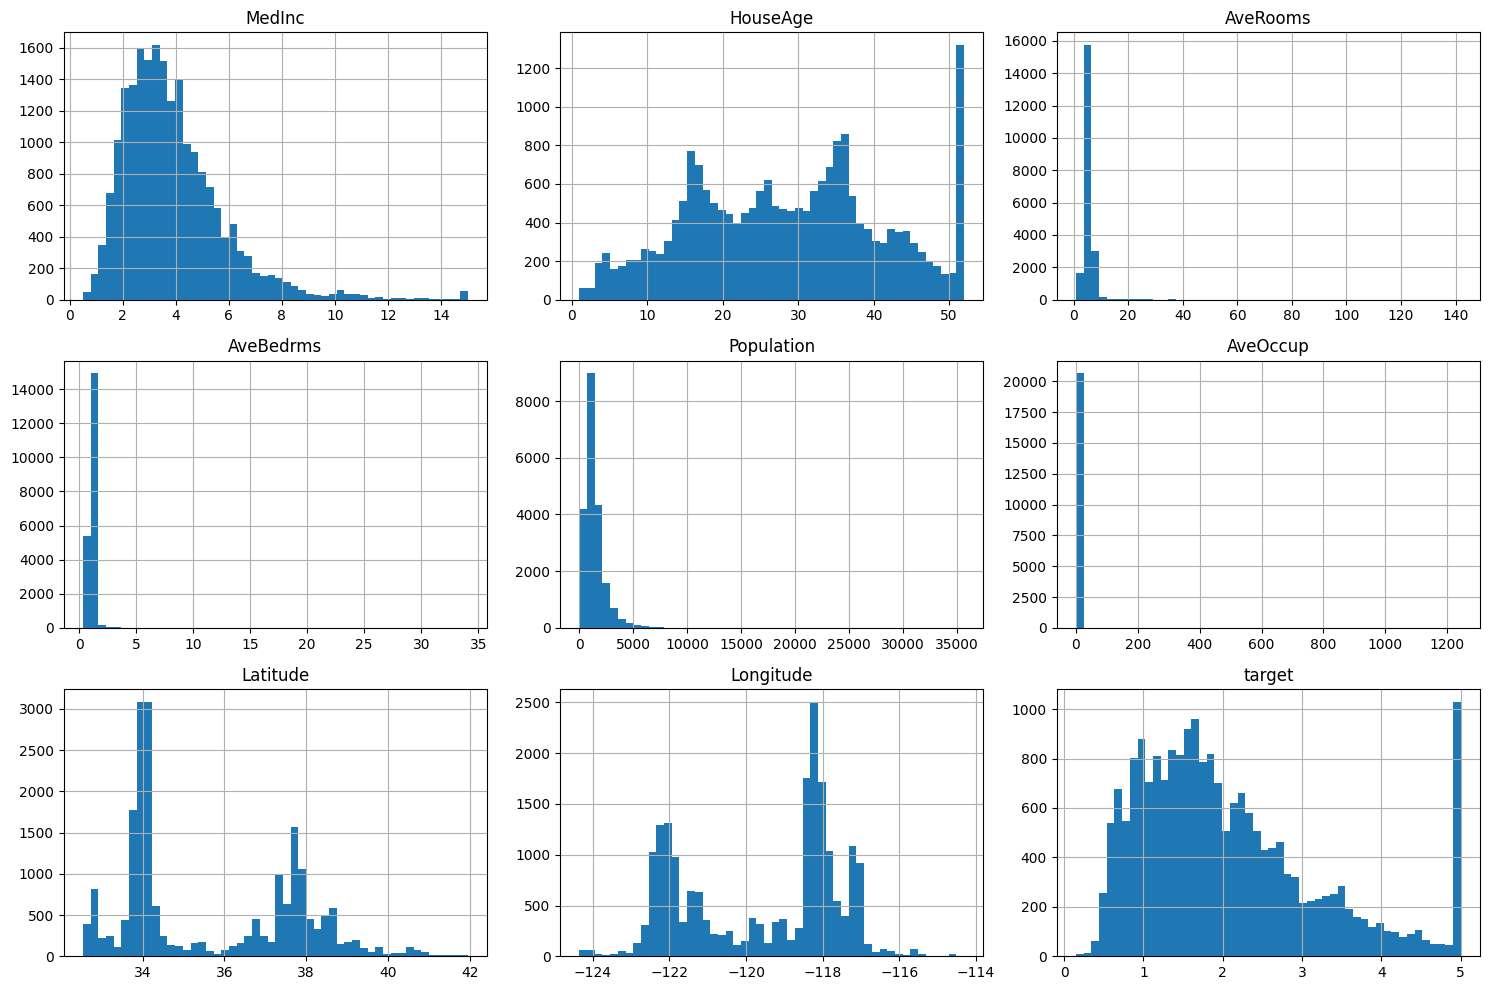

In [27]:
housing.hist(figsize=(15, 10),bins=50)
plt.tight_layout()
plt.show()

Notemos que en general, los datos se concentran en la media, como era de esperarse por las desvaciones estandar pequeñas. Sin embargo, en ´HouseAge´, en ´Latitude´ y ´Longitude´ hay picos de datos. En los dos ultimo indica que hay preferencias geograficas

4. **Preprocesamiento:**

In [91]:
housing_clean=pd.DataFrame()
housing_copia=housing.copy()
for column in housing.columns:
  mean=housing[column].mean()
  std=housing[column].std()
  housing_copia = housing_copia[np.absolute(housing_copia[column]-mean)<2*std].reset_index().drop(columns ="index")
  housing_clean[column]=housing_copia[column]
housing_clean['target']=housing['target']
housing_clean.dropna(inplace=True)
housing_clean.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,4.526
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.585
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.521
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,3.413
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,3.422


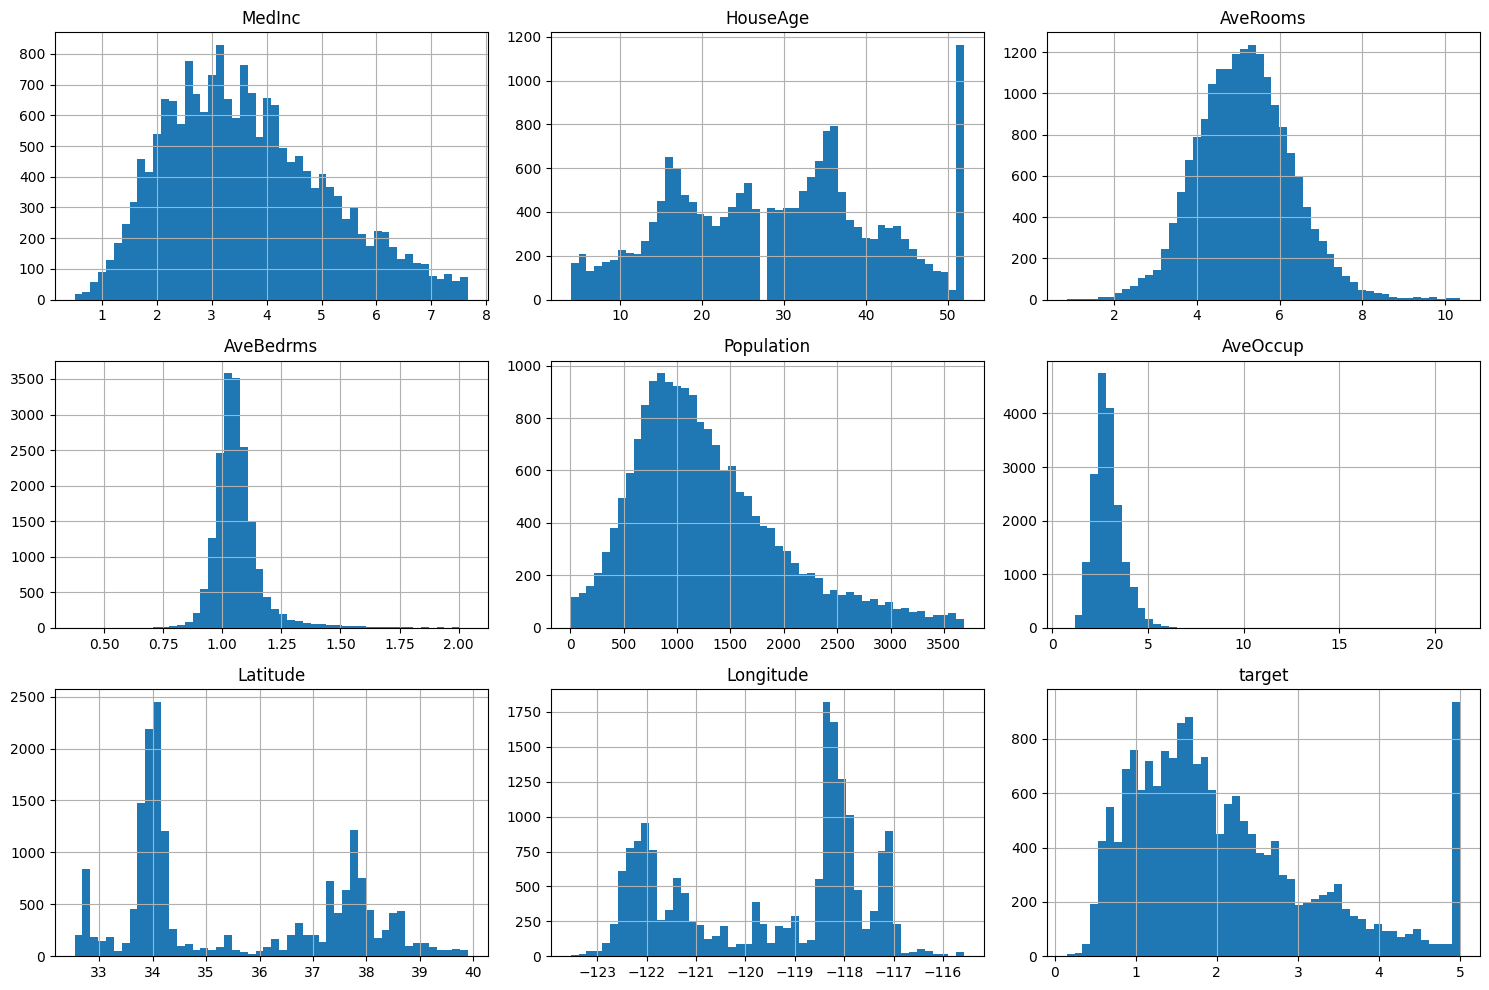

In [92]:
housing_clean.hist(figsize=(15, 10),bins=50)
plt.tight_layout()
plt.show()

**5. Selección de modelo y 6. Metricas y analisis de resultados:**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
y=housing_clean['target']
X=housing_clean.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=23)

In [96]:
#Regresion Lineal
Lineal=LinearRegression()
Lineal.fit(X_train,y_train)
y_lineal_pred=Lineal.predict(X_test)
metricas_lineal=pd.DataFrame({'y':y_test,'yhat':y_lineal_pred})
regression_metrics(metricas_lineal)

,mae,mse,rmse,mape,smape
0,0.8931,1.3074,1.1434,59.0217,0.7423


In [97]:
#Arbol de decision
Arbol=DecisionTreeRegressor()
Arbol.fit(X_train,y_train)
y_arbol_pred=Arbol.predict(X_test)
metricas_arbol=pd.DataFrame({'y':y_test,'yhat':y_arbol_pred})
regression_metrics(metricas_arbol)

,mae,mse,rmse,mape,smape
0,0.7143,1.1356,1.0656,39.7926,0.5693


In [98]:
#Modelo SVR
SVR=SVR()
SVR.fit(X_train,y_train)
y_svr_pred=SVR.predict(X_test)
metricas_svr=pd.DataFrame({'y':y_test,'yhat':y_svr_pred})
regression_metrics(metricas_svr)

,mae,mse,rmse,mape,smape
0,0.886,1.4281,1.1951,51.6667,0.6813


In [99]:
#Regresion Random Forest
forest_regressor = RandomForestRegressor()
forest_regressor.fit(X_train, y_train)
y_forest_pred = forest_regressor.predict(X_test)
metricas_forest=pd.DataFrame({'y':y_test,'yhat':y_forest_pred})
regression_metrics(metricas_forest)

,mae,mse,rmse,mape,smape
0,0.5463,0.5667,0.7528,32.1056,0.4861


Dado las metricas de regresion de los cuatro modelos probados anteriormente, se concluye que la regresion con ´Random Forest´ da mejores resultados

7. **Visualización de resultados del modelo:**




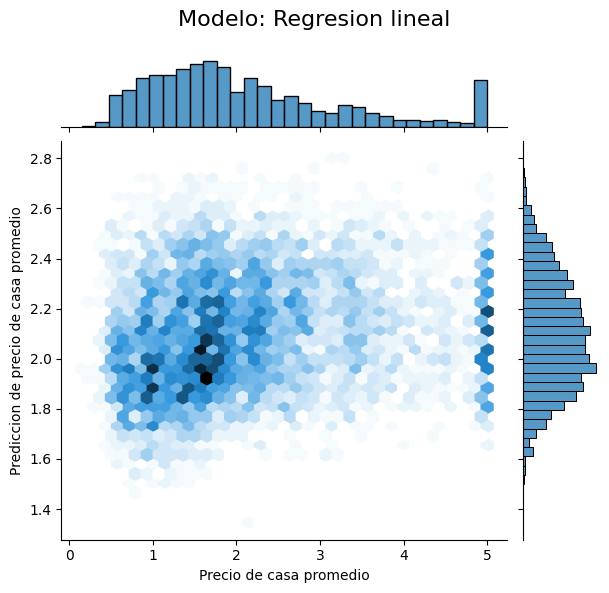

In [123]:
#regresion lineal
g=sns.jointplot(x=y_test, y=y_lineal_pred, kind="hex")
plt.xlabel("Precio de casa promedio")
plt.ylabel("Prediccion de precio de casa promedio")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Modelo: Regresion lineal", fontsize=16)
plt.show()

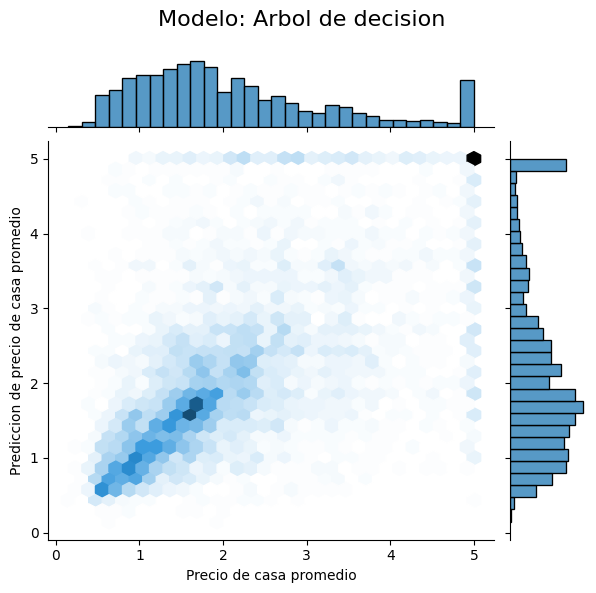

In [128]:
#Abol de decision
g=sns.jointplot(x=y_test, y=y_arbol_pred, kind="hex")
plt.xlabel("Precio de casa promedio")
plt.ylabel("Prediccion de precio de casa promedio")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Modelo: Arbol de decision", fontsize=16)
plt.show()

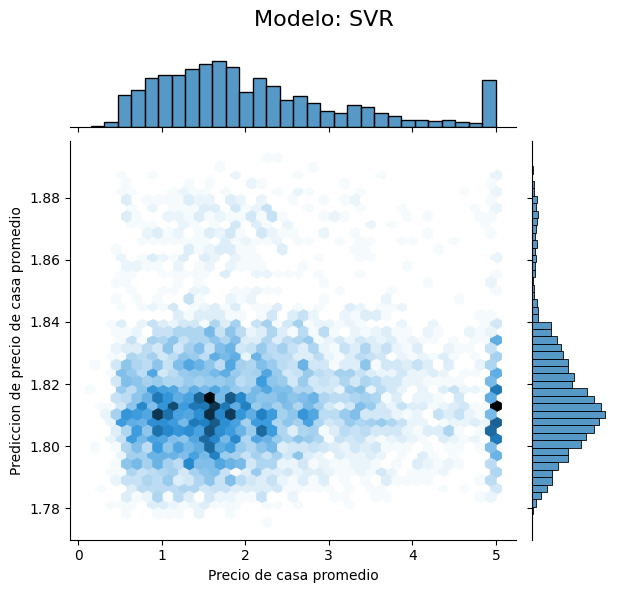

In [126]:
#SVR
g=sns.jointplot(x=y_test, y=y_svr_pred, kind="hex")
plt.xlabel("Precio de casa promedio")
plt.ylabel("Prediccion de precio de casa promedio")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Modelo: SVR", fontsize=16)
plt.show()

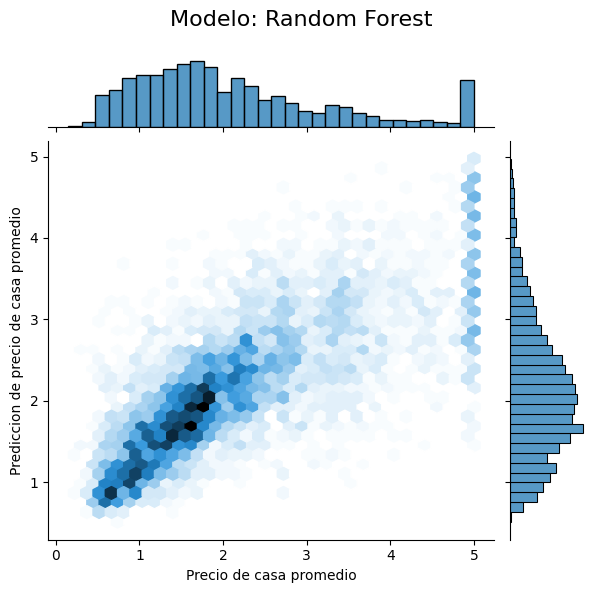

In [127]:
#Random Forest
g=sns.jointplot(x=y_test, y=y_forest_pred, kind="hex")
plt.xlabel("Precio de casa promedio")
plt.ylabel("Prediccion de precio de casa promedio")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Modelo: Random Forest", fontsize=16)
plt.show()

Este tipo de grafico grafica la densidad de puntos en hexagonos, estos son mas oscuros si la densidad es cercana a 1. Por otro lado, el grafico de caja en la parte superior representa la distribucion de la variable en el eje x. Asi mismo, el grafico de caja en el costado derecho representa la distribucion de la variable en el eje y.

Para poder decidir si un modelo es bueno o no. Deberiamos esperar que en los graficos de caja se parezcan entre ellos y que los colores de los hexagonos se acentuen cerca de la linea y=x.

Es inmediato que de los 4 modelos probados el mejor es el de Random Forest, pues, las distribuciones se parecen y la densidad de los puntos se concentra en el eye x=y. Le sigue el modelo de Arbol de decisiones. Si bien, no es el mejor es mucho mas preciso que los otros dos modelos.

En estos dos ultimos la densidad de los puntos se dispersa alrededor del grafico.